## En este Notebook, exploraremos las columnas con la historia financiera de cada cliente

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 400 
import numpy as np
df = pd.read_csv('df_clean_3.csv')

In [2]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


Pondremos primero las variables con historia finaciera en una lista, para poder estudiarlas:

In [2]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5','PAY_6']

In [3]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


Observamos aquí que el tiempo máximo de atraso en los pagos no supera los 8 meses. 

Veamos PAY_1=pay_feats[0]

In [4]:
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

<AxesSubplot:>

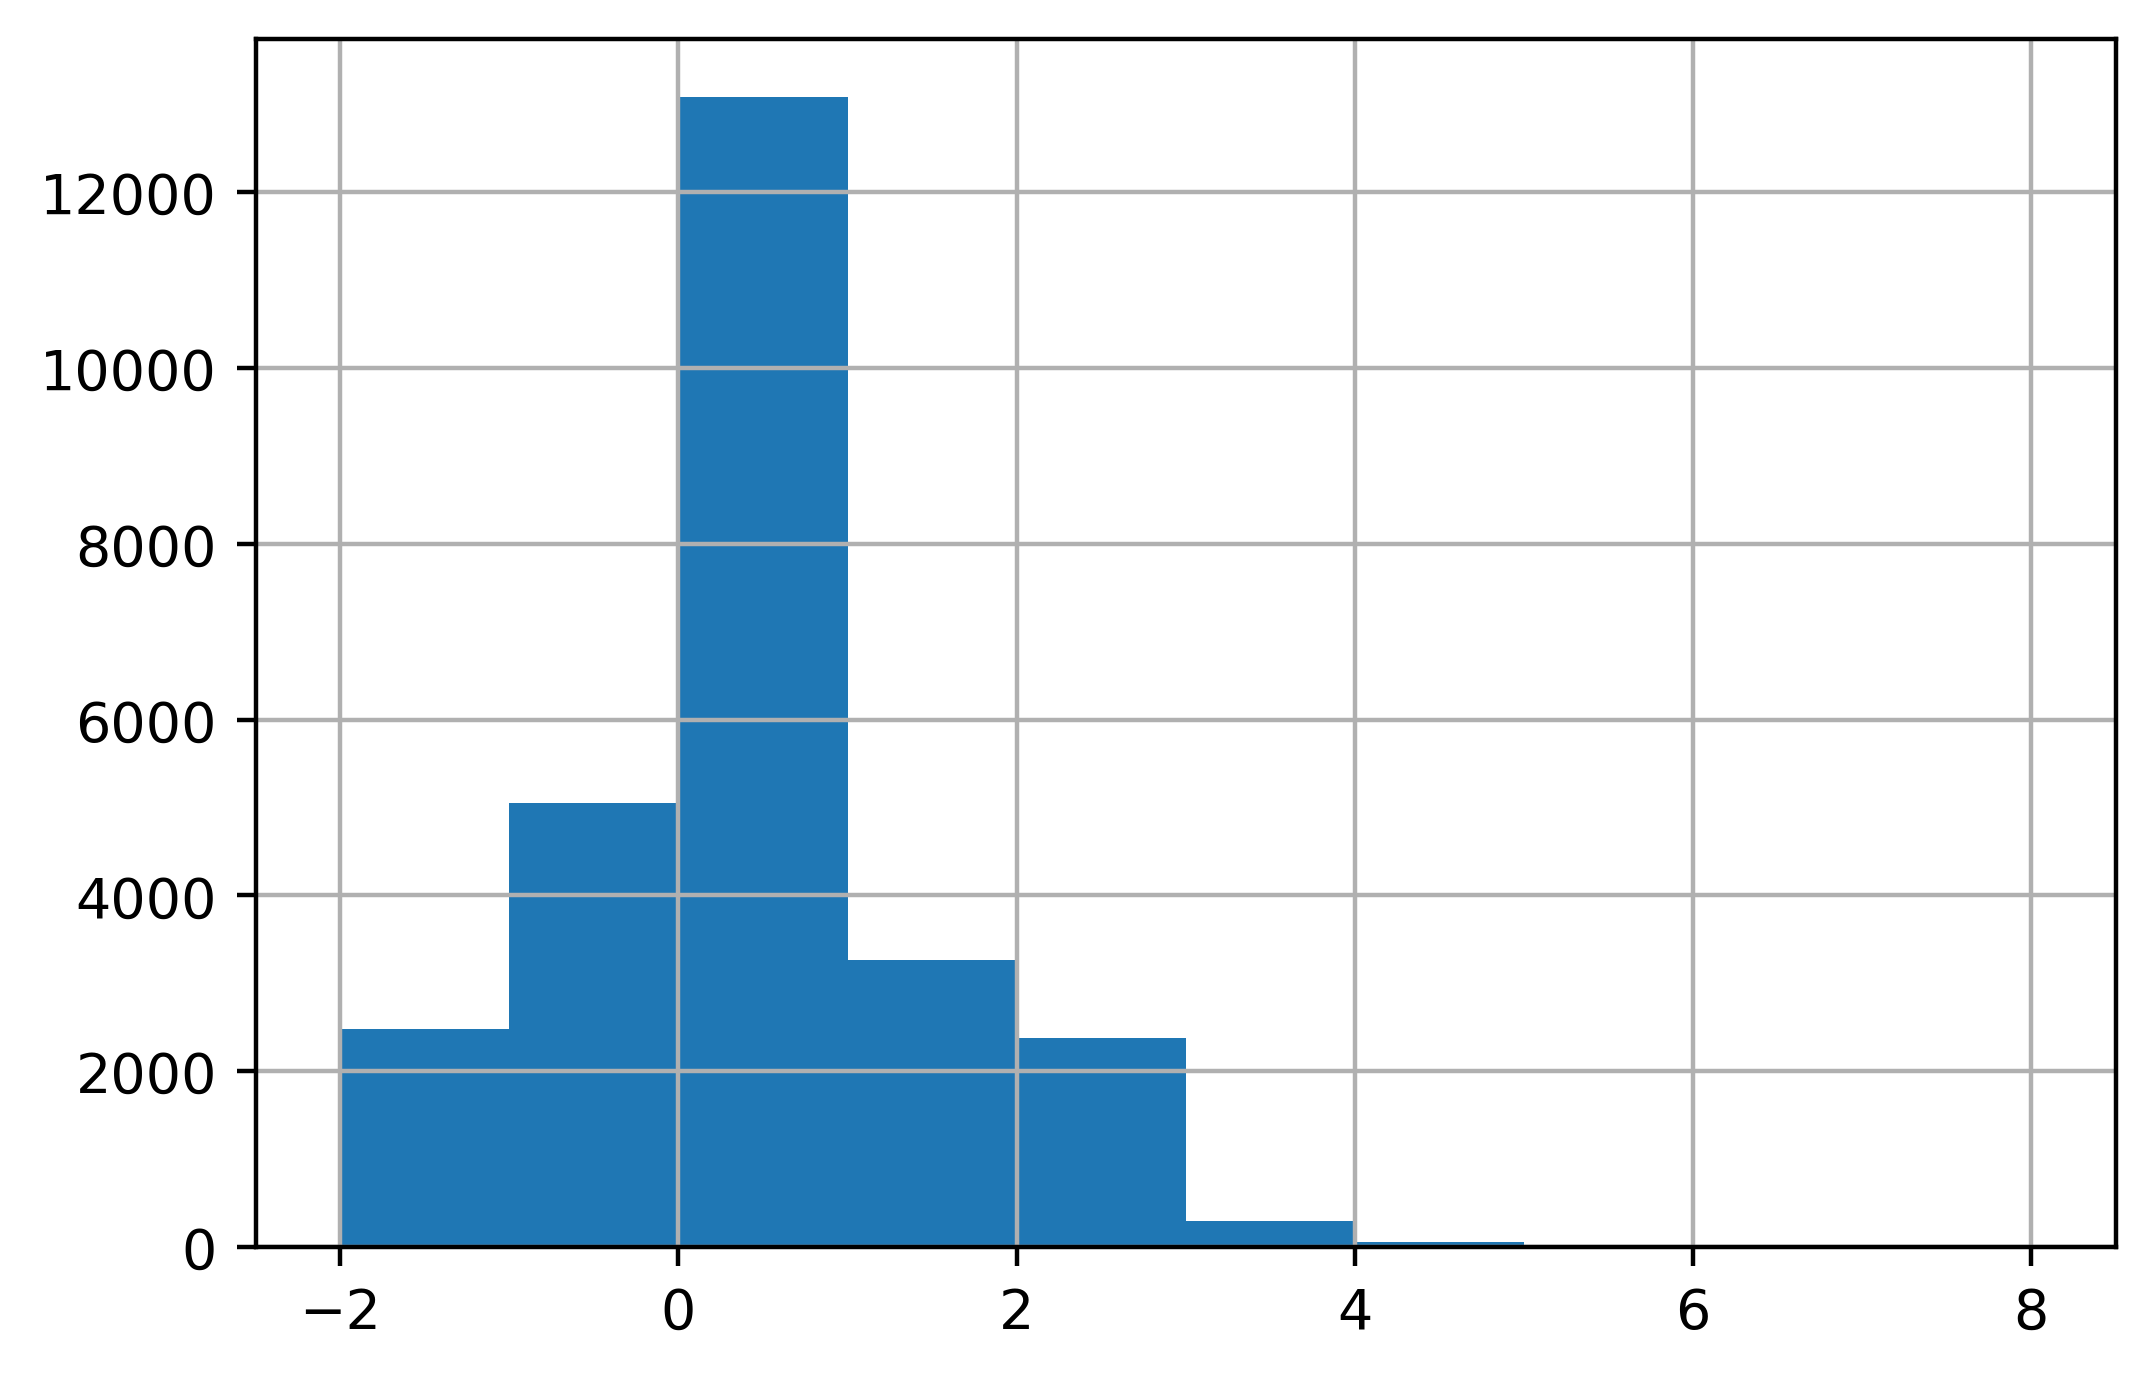

In [5]:
df[pay_feats[0]].hist()

Vamos a mejorar  este gráfico:

In [6]:
pay_1_bins = np.array(range(-2,10)) - 0.5


Text(0, 0.5, 'Number of accounts')

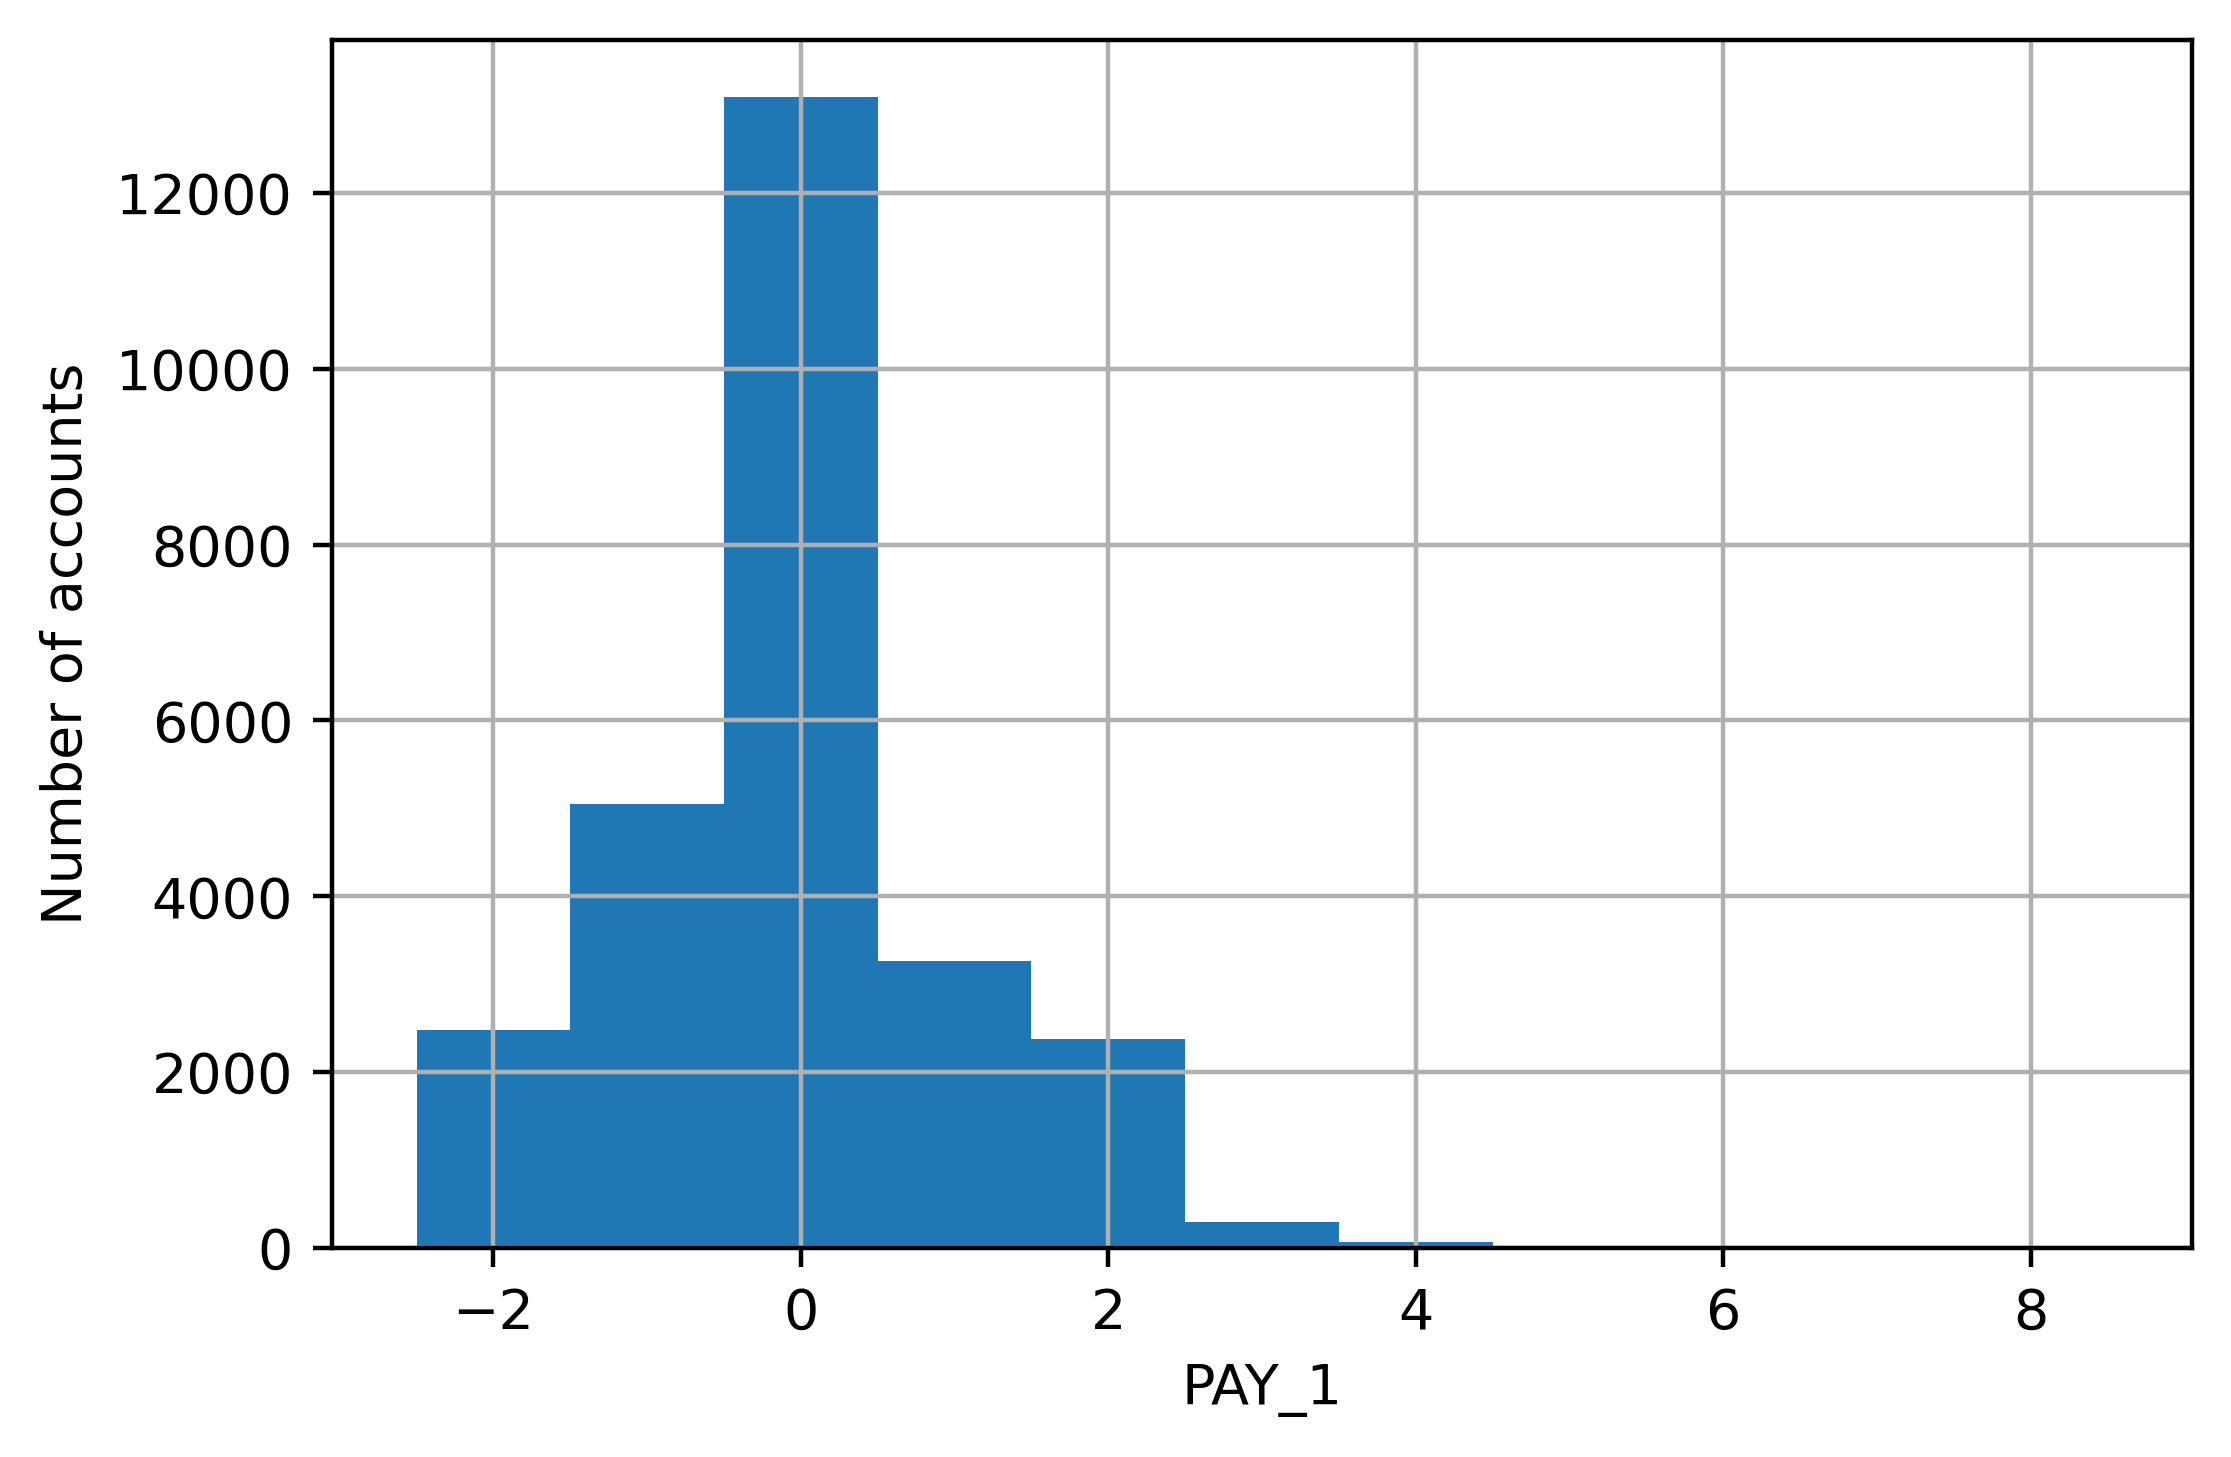

In [7]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

La mayoría de las cuentas está en el pago mínimo.

array([[<AxesSubplot:title={'center':'PAY_1'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>],
       [<AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'PAY_5'}>,
        <AxesSubplot:title={'center':'PAY_6'}>]], dtype=object)

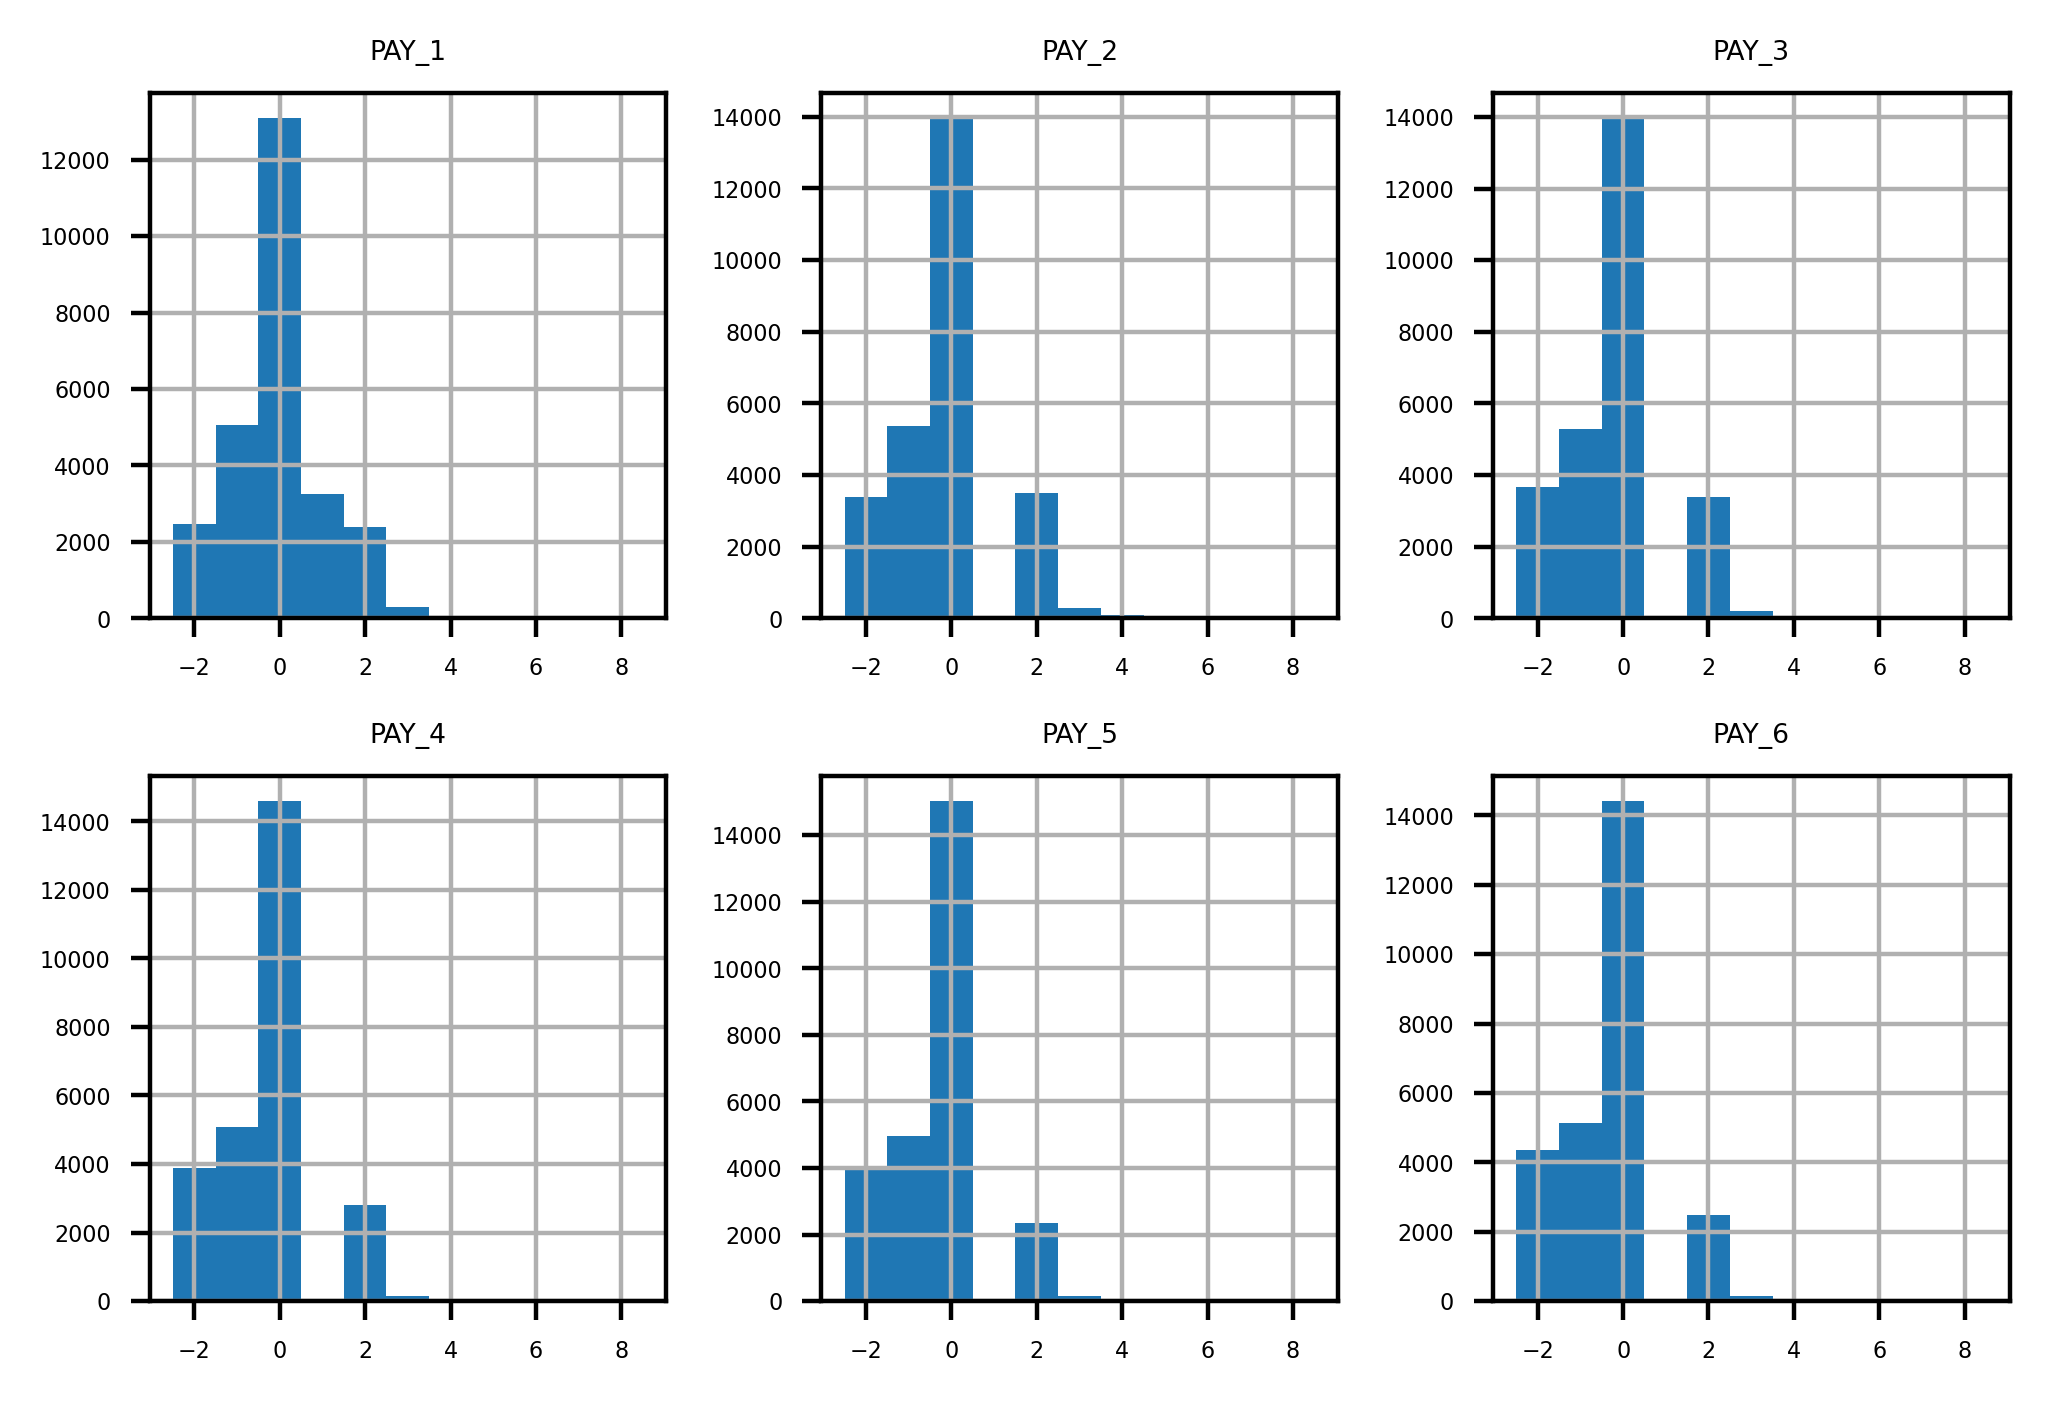

In [8]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

In [9]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


Hay incongruencia entre los pagos de agosto (Pay_2) y los del mes anterior,julio(Pay_3). Por ejemplo, en la linea 15,en julio no había atraso, en cambio en Agosto hay dos meses de atraso, cuando sólo debería ir 1. Del mismo modo, en la linea 0, en julio estaba todo pagado, en cambio en Agosto hay dos meses de atraso. En los otros grágficos también se pueden notar inconsistencias de este tipo. Estas inconsistencias en los datos, nos llevan a tener que rechazar variables. Nos quedaremos sólo con PAY_1 (a falta de información adicional) como variable predictiva.

Guardamos el análisis en el archivo: df_clean_4.csv

In [10]:
df.to_csv('df_clean_4.csv',index=False)